In [1]:
import pandas as pd
import sys
sys.path.append('../utils')
import visualization as visualization
import generic as generic
import project_utils as project_utils
import numpy as np
import matplotlib.pyplot as plt
import importlib



pygame 2.6.1 (SDL 2.28.4, Python 3.11.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Constants

In [2]:
epidemic_years = ['2012_13', '2015_16', '2018_19', '2023_24']

### Load Data

In [3]:
dengue_data = pd.read_csv('../data/correlation/dengue_data_with_coordinates.csv')
ovitraps_data = pd.read_csv('../data/correlation/ovitraps_data_with_coordinates.csv')


### Process Data

In [20]:
# Dengue data
weekly_dengue_data = project_utils.get_weekly_dengue(dengue_data)
daily_dengue_cases = project_utils.get_daily_dengue(dengue_data)

# ovitraps data
weekly_ovitraps = project_utils.get_weekly_ovitraps(ovitraps_data)
weekly_ovitraps_sum = weekly_ovitraps.sum(axis=1)
weekly_ovitraps_mean = weekly_ovitraps.mean(axis=1)



### Plot data

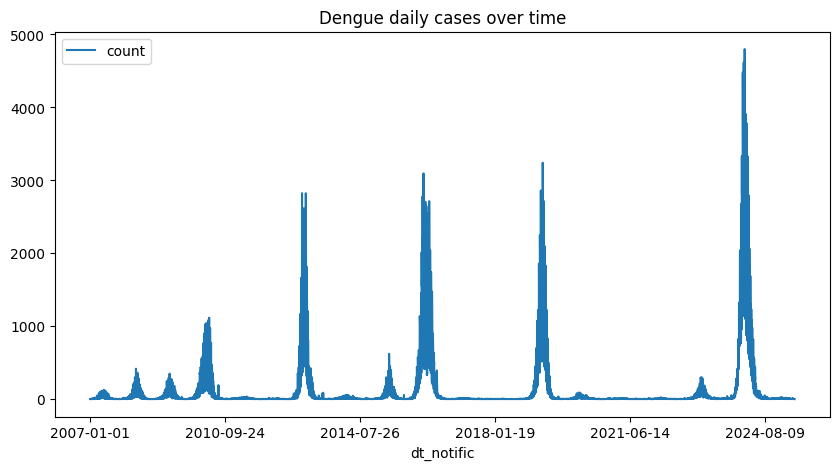

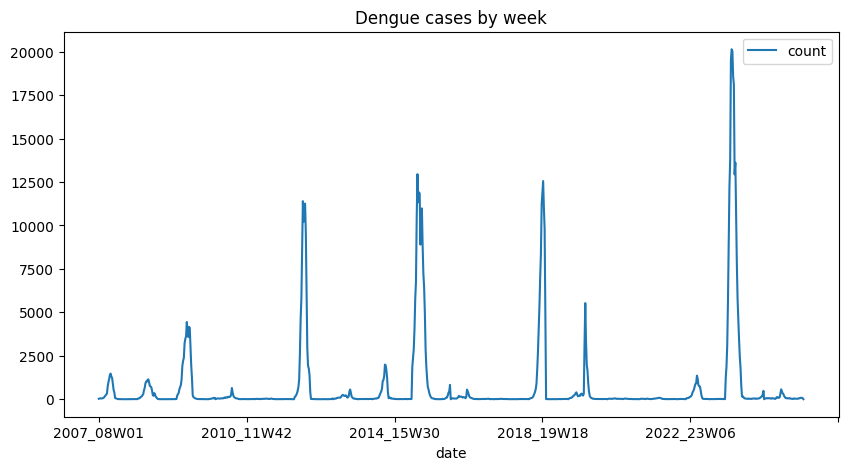

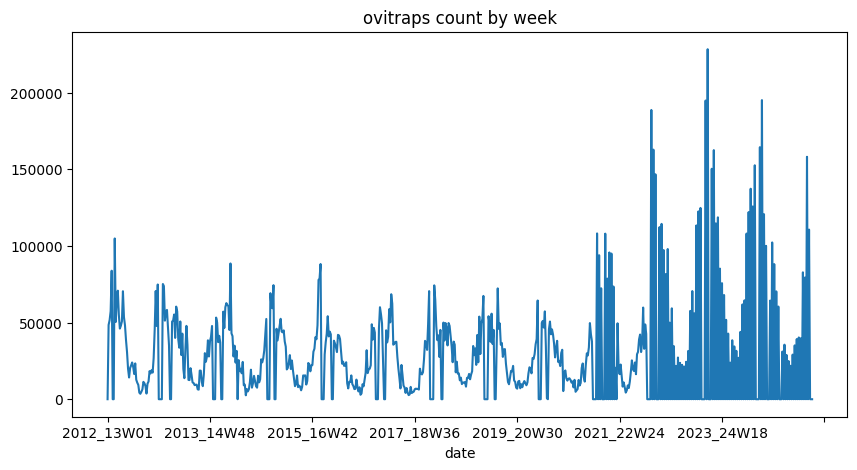

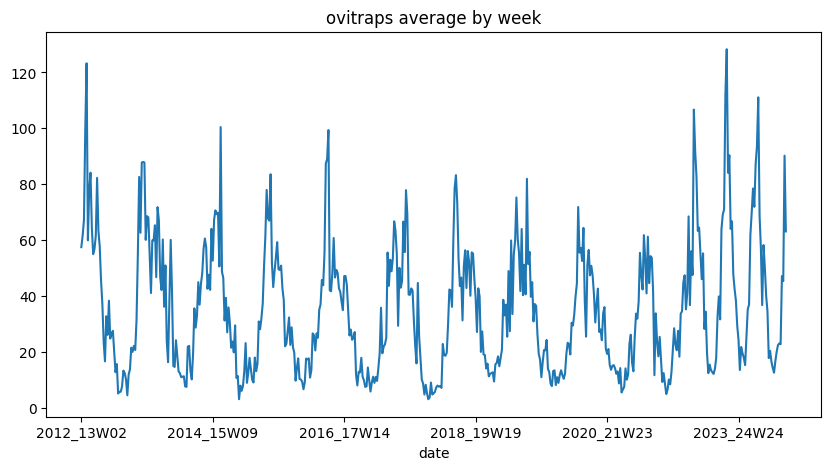

In [5]:
daily_dengue_cases.plot(kind='line', figsize=(10, 5), title='Dengue daily cases over time')
plt.show()
weekly_dengue_data.plot(kind='line', figsize=(10, 5), title='Dengue cases by week')
plt.show()
weekly_ovitraps_sum.plot(kind='line', figsize=(10, 5), title='ovitraps count by week')
plt.show()
weekly_ovitraps_mean.dropna().plot(kind='line', figsize=(10, 5), title='ovitraps average by week')
plt.show()


# Correlation Analysis

### All years

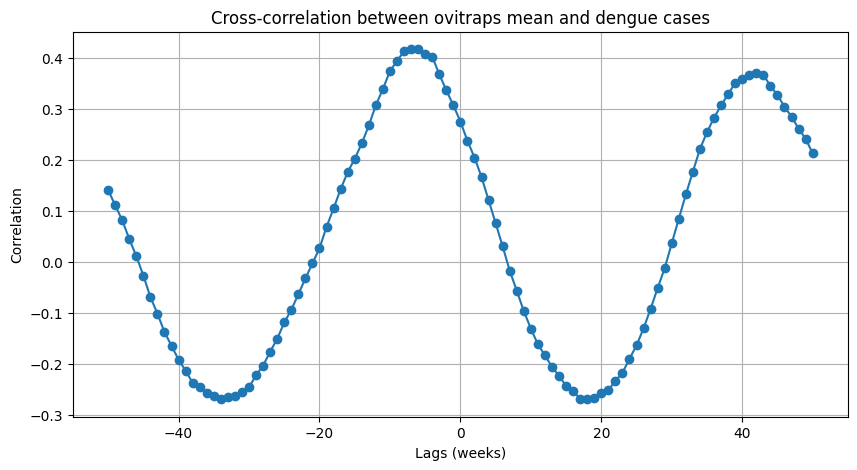

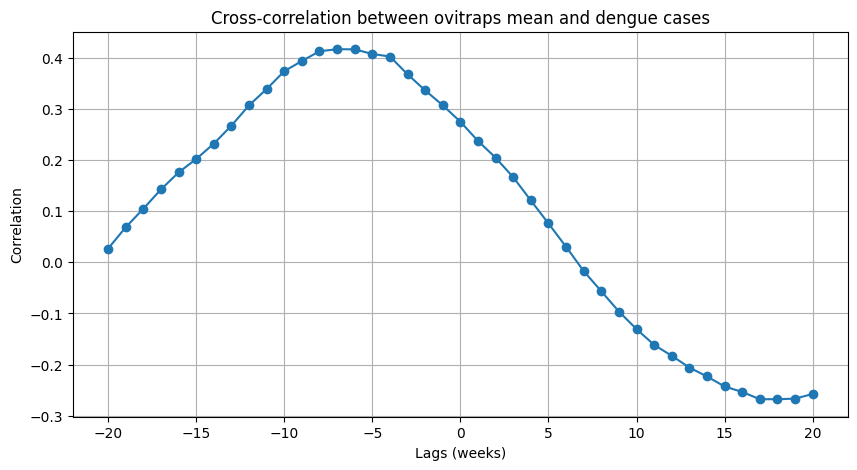

In [80]:
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases',
    x_label = 'Lags (weeks)',

    )

### Epidemic years


<Axes: title={'center': 'Dengue cases by week (epidemic years)'}, xlabel='date'>

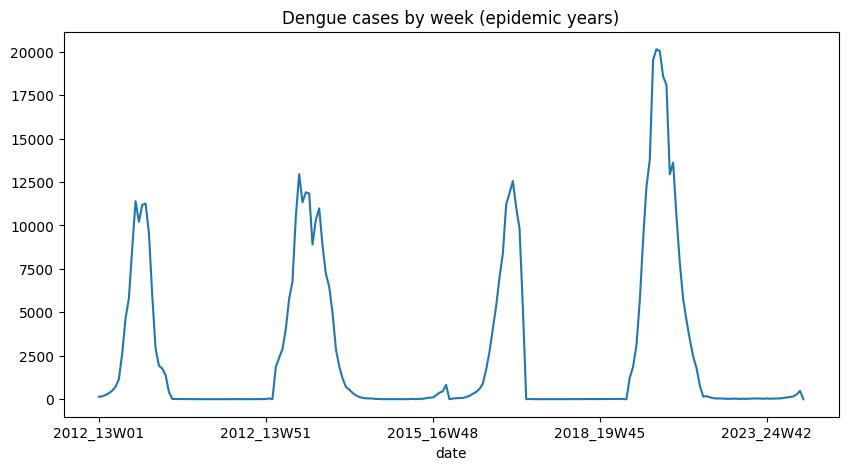

In [75]:
epidemic_mask = weekly_dengue_data.index.map(lambda x: x[:7] in epidemic_years)
weekly_dengue_data_epidemic = weekly_dengue_data[epidemic_mask]
weekly_dengue_data_epidemic.plot(kind='line', figsize=(10, 5), title='Dengue cases by week (epidemic years)')


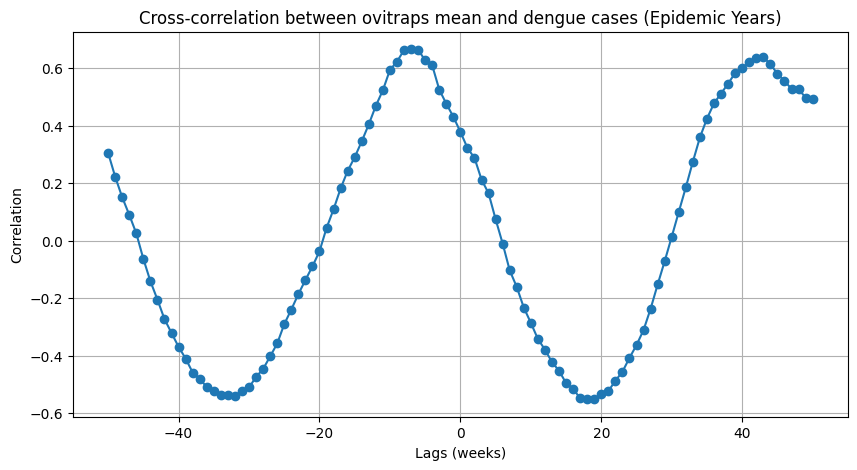

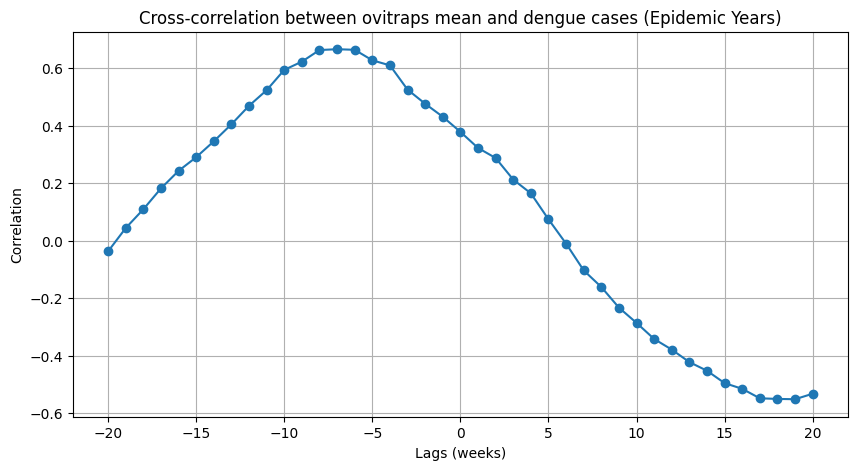

In [81]:
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)',
    x_label = 'Lags (weeks)',
    )

### Non epidemic years

<Axes: title={'center': 'Dengue cases by week (epidemic years)'}, xlabel='date'>

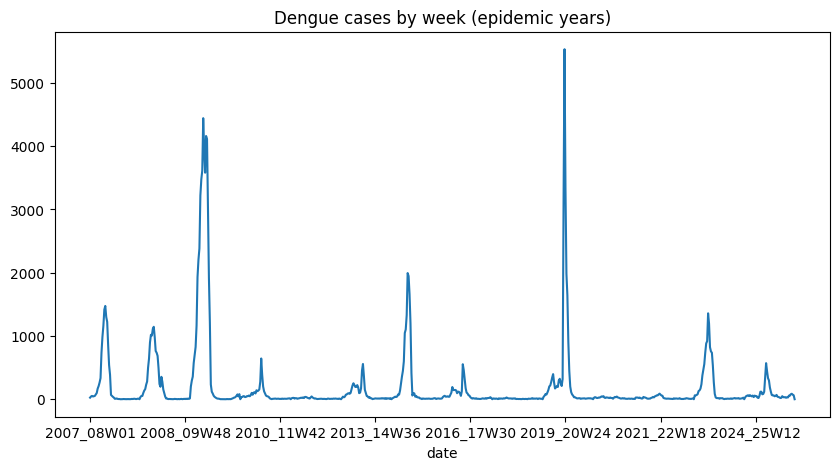

In [ ]:
weekly_dengue_data_non_epidemic = weekly_dengue_data[~epidemic_mask]
weekly_dengue_data_non_epidemic.plot(kind='line', figsize=(10, 5), title='Dengue cases by week (epidemic years)')


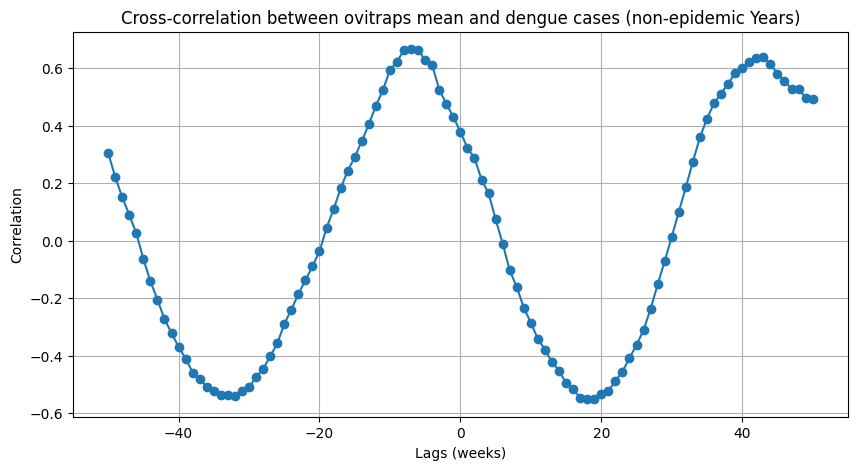

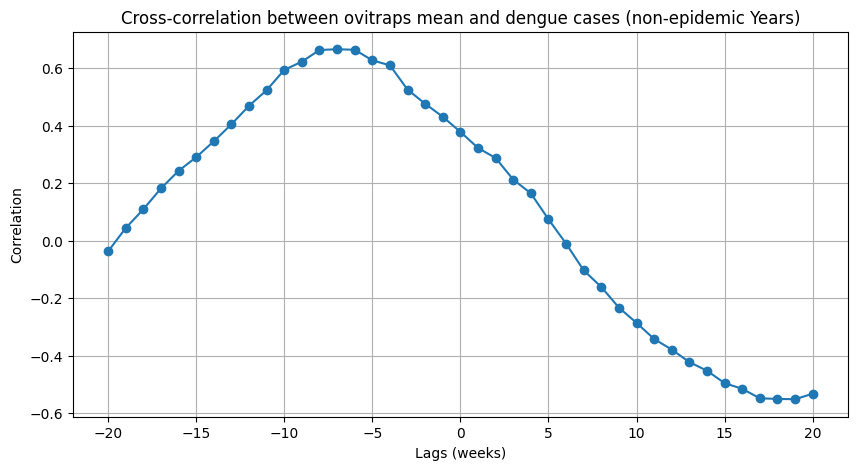

In [ ]:
# Filter non epidemic years
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)',
    x_label = 'Lags (weeks)',
    )

### Correlation by year

Skipping year 2006_07 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2007_08 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2008_09 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2009_10 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2010_11 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2011_12 due to error: Both series must have at least one valid value to calculate correlation.


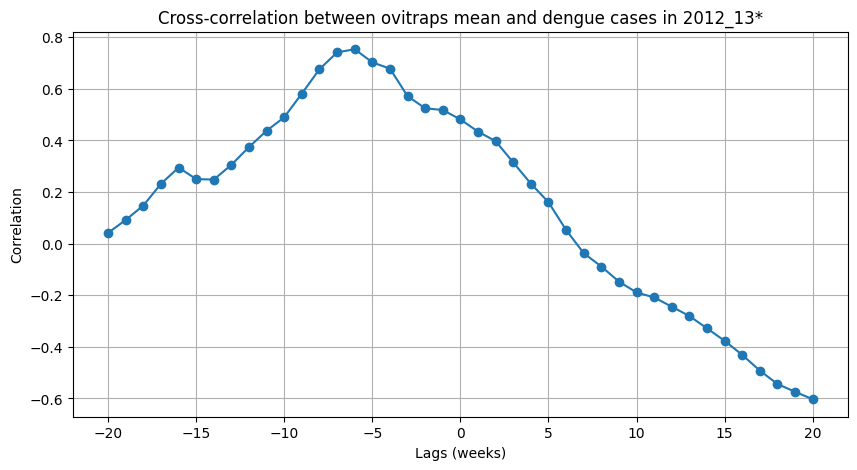

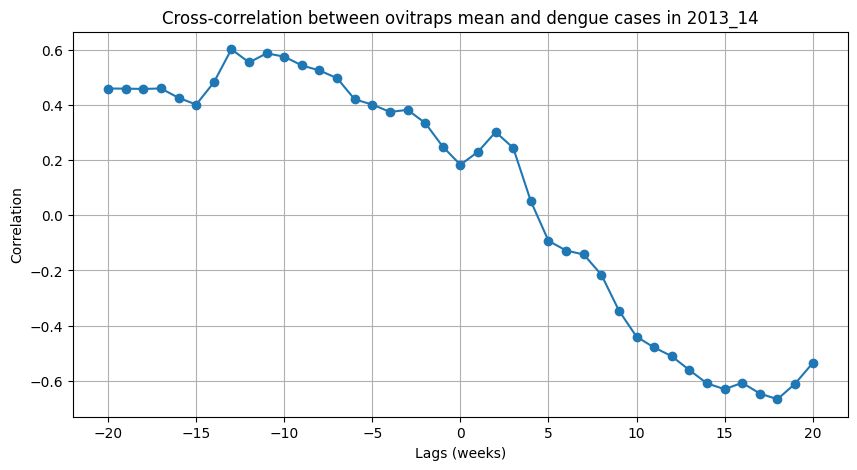

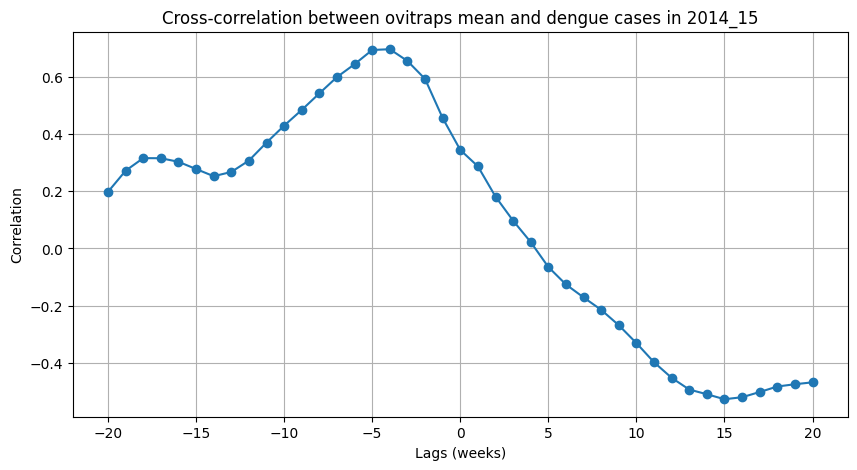

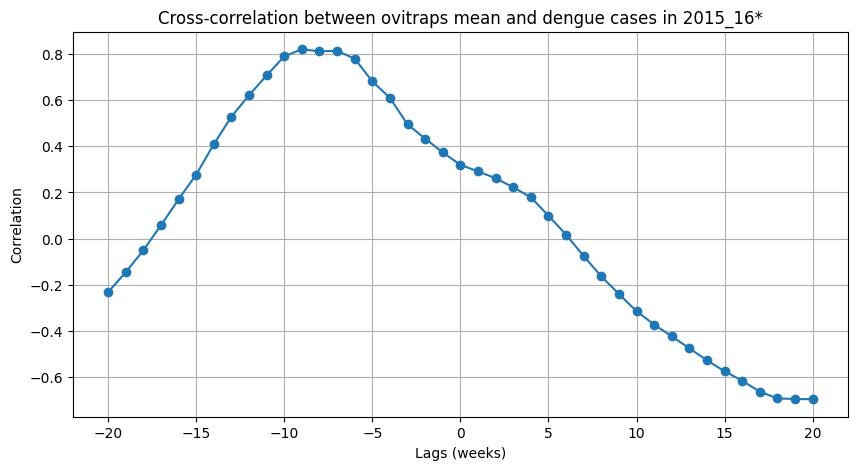

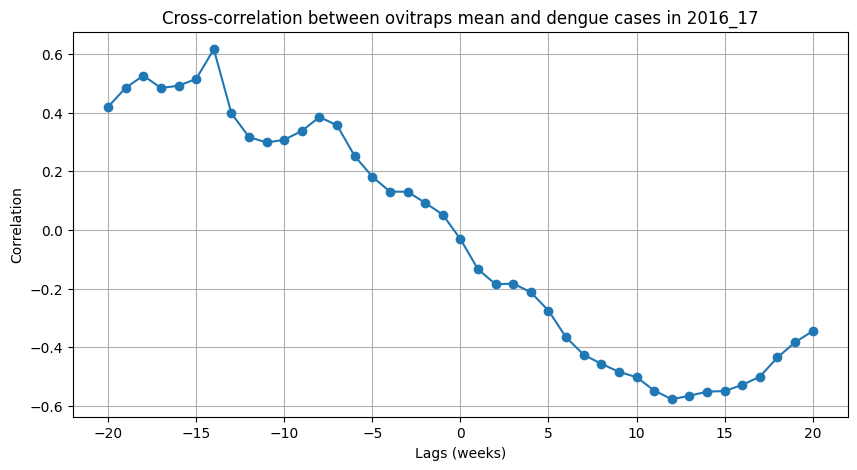

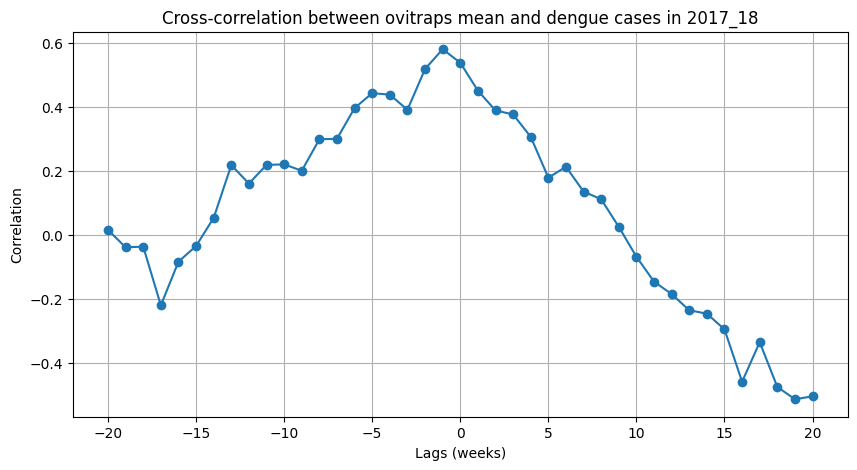

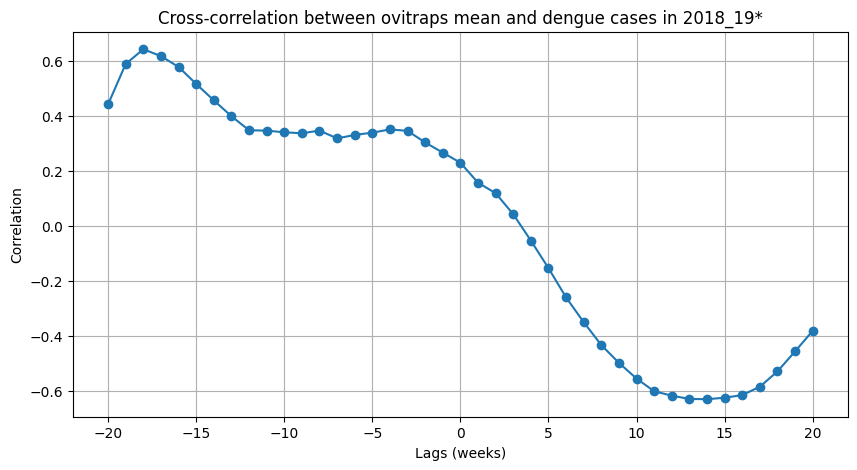

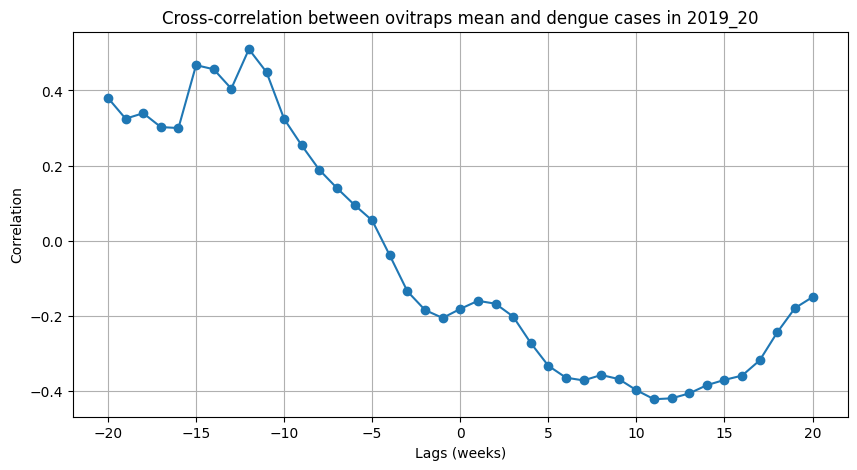

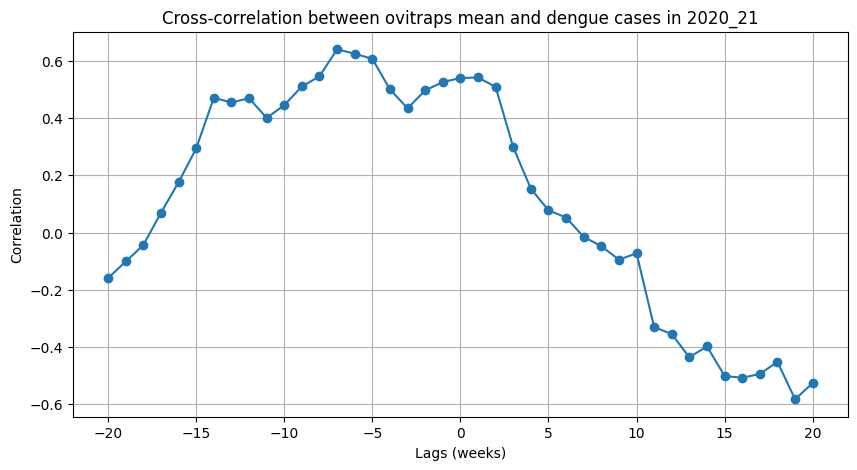

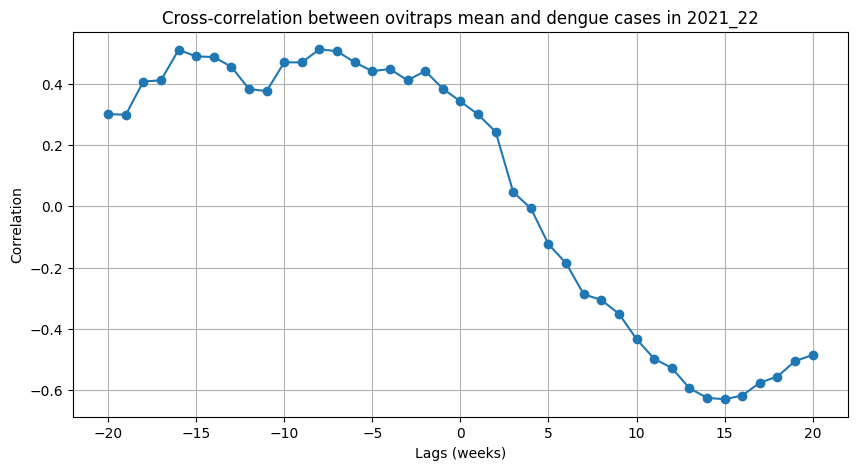

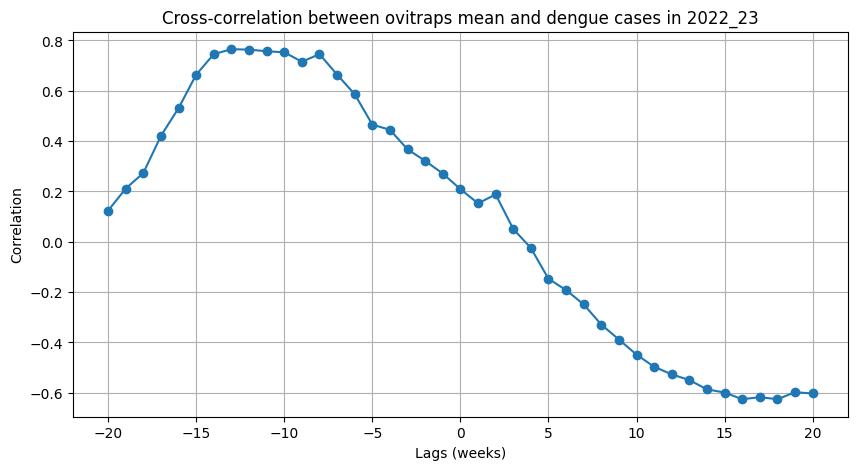

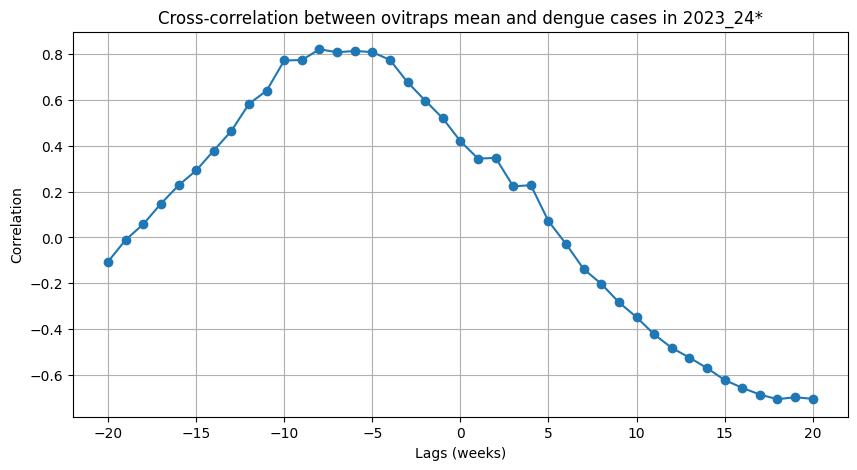

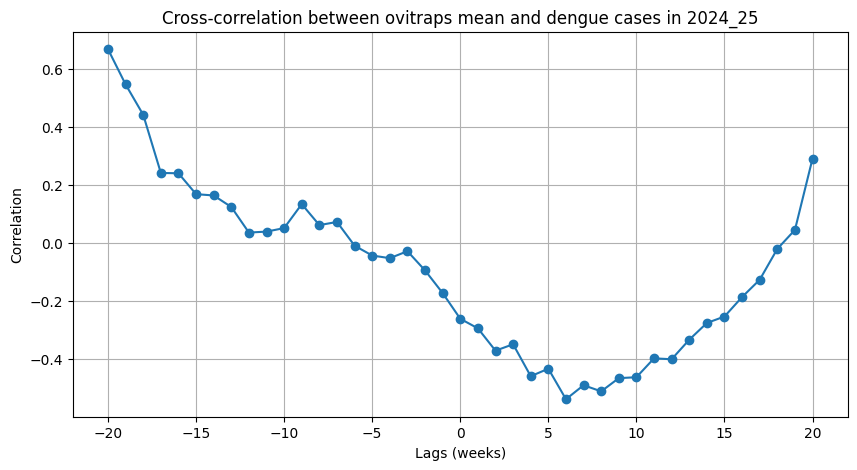

Both series are empty after dropping NaN values.


c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: Run

In [124]:
all_years = dengue_data.anoepid.unique()
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_mask = weekly_dengue_data.index.map(lambda x: x[:7] == year)
    year_data = weekly_dengue_data[year_mask]
    try:
        if year in epidemic_years:
            marker = '*'
        else:
            marker = ''    
        # Plot cross-correlation for each year
        generic.plot_cross_correlation(
            series_1 = weekly_ovitraps_mean,
            series_2 = year_data,
            max_lag =  20,
            title = f'Cross-correlation between ovitraps mean and dengue cases in {year}{marker}',
            x_label = 'Lags (weeks)',
            )
        plt.show()
        
        # Get the maximum correlation for each year
        max_correlation_dict[year] = generic.max_correlation(
                                    series_1 = weekly_ovitraps_mean,
                                    series_2 = year_data,
                                    max_lag =  50,
                                            )
    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue

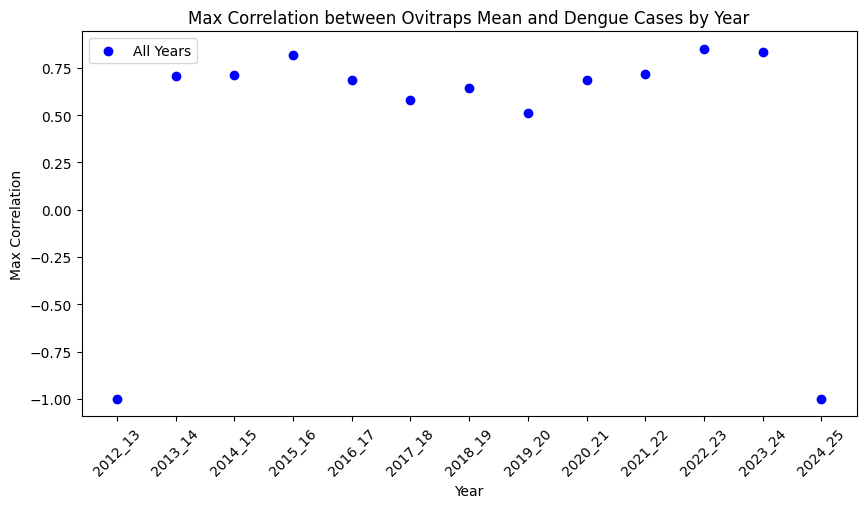

In [123]:
# Plot max correlations for all years
plt.figure(figsize=(10, 5))
plt.scatter(max_correlation_dict.keys(), [v[1] for v in max_correlation_dict.values()], color='blue', label='All Years')
plt.ylabel('Max Correlation')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()
plt.title('Max Correlation between Ovitraps Mean and Dengue Cases by Year')
plt.show()
